In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import Polynomial
from numpy.linalg import pinv as pseudoInverse
from numpy import linspace, matmul, random


def gaussianNoise():
	mu, sigma = 0, 4
	return random.normal(mu, sigma, 1)[0]


def getFunctionPlotData(function, xStart, xEnd, samples):
	x = linspace(xStart-5, xEnd+5, samples)
	y = []

	for value in x:
		y.append(function(value))

	return {"x": x, "y": y}


def getRandomSamples(function, xStart, xEnd, samples, noiseFunction):
	x = []
	y = []

	for _ in range(samples):
		currentX = random.uniform(xStart, xEnd)
		x.append(currentX)
		y.append(function(currentX) + noiseFunction())

	return {"x": x, "y": y}


def subRoutine(polyDegree):
	H = []

	for x in randomSamples["x"]:
		HLine = []
		for degree in range(polyDegree+1):
			HLine.append(pow(x, degree))
		H.append(HLine)

	HPseudoInverse = pseudoInverse(H)
	w = matmul(HPseudoInverse, y)
	approxFunction = Polynomial(w)
	approxFunctionSamples =  getFunctionPlotData(approxFunction, xStart, xEnd, 1000)

	plt.figure(polyDegree)
	plt.plot(originalFunctionSamples["x"], originalFunctionSamples["y"], "--r", label="Função Geradora")
	plt.plot(randomSamples["x"], randomSamples["y"], "go", label="Amostras")
	plt.plot(approxFunctionSamples["x"], approxFunctionSamples["y"], "-b", label="Polinômio Obtido")
	plt.legend(loc="upper center")
	plt.xlabel("x")
	plt.ylabel("y")

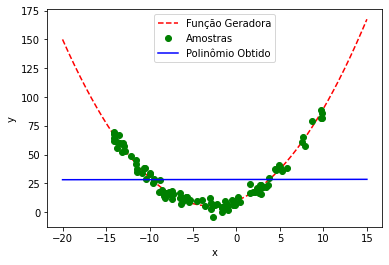

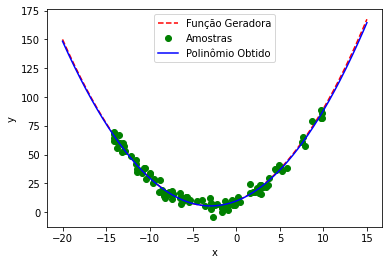

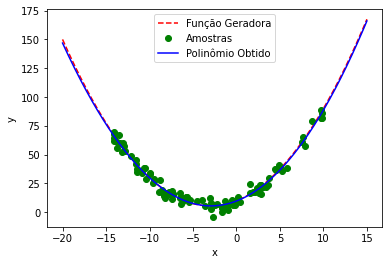

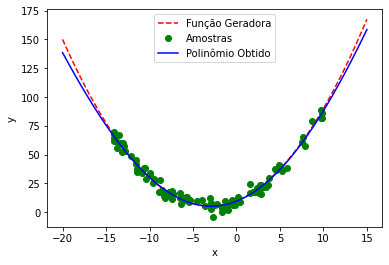

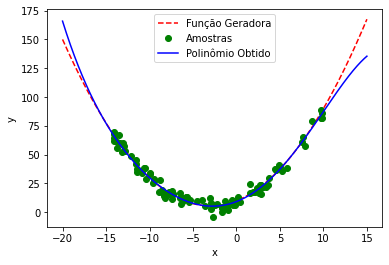

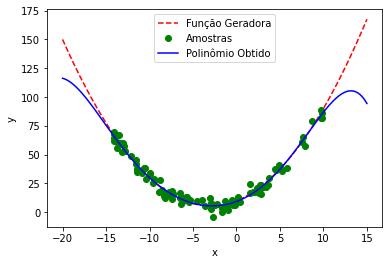

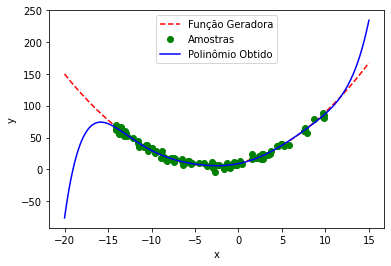

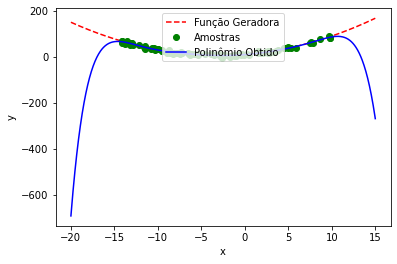

In [2]:
xStart, xEnd = -15, 10
samples = 100

generatorFunction = Polynomial([10, 3, 0.5])
randomSamples = getRandomSamples(generatorFunction, xStart, xEnd, samples, gaussianNoise)
originalFunctionSamples = getFunctionPlotData(generatorFunction, xStart, xEnd, 1000)
y = randomSamples["y"]

for polyDegree in range(1, 9):
	subRoutine(polyDegree)